# **Part 2 NLP**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
import html
import unicodedata

import spacy
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import re
import string
from tensorflow import keras
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## **Loading the Data**

In [ ]:
train_data=pd.read_csv("/content/drive/Shareddrives/Deep Learning Lab/Lab 2/Part-2/jigsaw-toxic-comment-classification-challenge 2/train.csv")

In [ ]:
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
test_data=pd.read_csv("/content/drive/Shareddrives/Deep Learning Lab/Lab 2/Part-2/jigsaw-toxic-comment-classification-challenge 2/train.csv")

In [ ]:
test_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
X_train=train_data["comment_text"].values
X_test=test_data["comment_text"].values
y_train=train_data.iloc[:,2:].values

Frequency of Labels

Text(0.5, 0, 'Feature Labels')

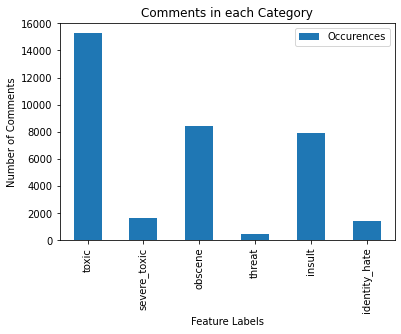

In [ ]:
features=train_data.drop(columns=['id','comment_text'])

count=[]
categories=list(features.columns.values)
for i in categories:
  count.append((i,features[i].sum()))

df=pd.DataFrame(count,columns=['Labels','Occurences'])
df.plot(x="Labels",y="Occurences",kind='bar')
plt.title("Comments in each Category")
plt.ylabel("Number of Comments")
plt.xlabel("Feature Labels")

# **Preprocessing the Data**

Removing Special Characters

In [ ]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


Converting Uppercase Characters to Lowercase

In [ ]:
def to_lowercase(text):
    return text.lower()

Removing Punctuations

In [ ]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


Replacing Numbers

In [ ]:
def replace_numbers(text):
    return re.sub(r'\d+', '', text)


Removing Whitespaces

In [ ]:
def remove_whitespaces(text):
    return text.strip()

Removing Stopwords

In [ ]:
def remove_stopwords(words, stop_words):
  return [word for word in words if word not in stop_words]

Applying Porter Stemmer

In [ ]:
def stem_words(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

Performing Lemmatization

In [ ]:
def lemmatize_words(words):
     lemmatizer = WordNetLemmatizer()
     return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

Creating Tokens

In [ ]:
def text2words(text):
    return word_tokenize(text)

Converting the Text

In [ ]:
def cleaned_text( text):
    text = remove_special_chars(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)
# Applying the preprocessing steps to the training data
train_data['comment_text'] = train_data['comment_text'].apply(lambda x: cleaned_text(x))
train_data.sample(1)['comment_text'].values[0]


'deletion believe page make obsolete geohack provide much better functionality integrate thousand article one object ill request page delete'

Applying the preprocessing steps to the test data

In [ ]:
test_data['comment_text'] = test_data['comment_text'].apply(lambda x: cleaned_text(x))

In [ ]:
test_data.sample(1)['comment_text'].values[0]

'fyi overzealous deletion hyperbola claim also frown upon dont quick delete information'

## **Creating the Model**

Tokenizing the comments

In [ ]:
tok = Tokenizer(num_words=1000, oov_token='UNK')
tok.fit_on_texts(train_data['comment_text'] )
# Extract binary BoW features
x_train = tok.texts_to_sequences(train_data['comment_text'])
x_test = tok.texts_to_sequences(test_data['comment_text'])

vocab_size = len(tok.word_index) + 1
vocab_size

208757

In [ ]:
maxlen = max([len(t) for t in x_train])
maxlen

1250

Applying padding to the text

In [ ]:
training_padded = pad_sequences(x_train,
                                maxlen=50, 
                                truncating='post', 
                                padding='post'
                               )
test_padded = pad_sequences(x_test,
                            maxlen=50, 
                            truncating='post', 
                            padding='post'
                               )

Defining the LSTM model

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(vocab_size, 128, input_length=50))
model.add(layers.LSTM(512, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(layers.LSTM(128, dropout=0.2,recurrent_dropout=0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='Adamax',
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 128)           26720896  
                                                                 
 lstm_2 (LSTM)               (None, 50, 512)           1312768   
                                                                 
 lstm_3 (LSTM)               (None, 128)               328192    
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dense_3 (Dense)             (None, 6)                 102       
                                                                 
Total params: 28,364,022
Trainable params: 28,364,022
Non-trainable params: 0
_________________________________________________________________


Training the model

In [ ]:
history = model.fit(training_padded,
                     train_data[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']],
                    epochs=5,
                    batch_size=512,
                   validation_split=0.2)

Epoch 1/5
250/250 [==============================] - 118s 454ms/step - loss: 0.1547 - accuracy: 0.9368 - val_loss: 0.1409 - val_accuracy: 0.9941
Epoch 2/5
250/250 [==============================] - 117s 468ms/step - loss: 0.1412 - accuracy: 0.9942 - val_loss: 0.1410 - val_accuracy: 0.9941
Epoch 3/5
250/250 [==============================] - 112s 447ms/step - loss: 0.1412 - accuracy: 0.9942 - val_loss: 0.1410 - val_accuracy: 0.9941
Epoch 4/5
250/250 [==============================] - 112s 446ms/step - loss: 0.1412 - accuracy: 0.9942 - val_loss: 0.1409 - val_accuracy: 0.9941
Epoch 5/5
250/250 [==============================] - 116s 462ms/step - loss: 0.1412 - accuracy: 0.9942 - val_loss: 0.1409 - val_accuracy: 0.9941


Model Evaluation

In [ ]:
results = model.evaluate(test_padded,test_data[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']], batch_size=128)

1247/1247 [==============================] - 42s 34ms/step - loss: 0.1411 - accuracy: 0.9942


In [ ]:
print("Accuracy:",results[1]*100)

Accuracy: 99.41655993461609


Predicting the Labels

In [ ]:
predicted_labels=model.predict(test_padded)

4987/4987 [==============================] - 163s 33ms/step


Converting the prediction arrray to a dataframe

In [ ]:
predicted_labels = pd.DataFrame(predicted_labels, columns = ['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate'])

Comparing predicted and true values

In [ ]:
print("Predicted Values #6\n",predicted_labels.loc[6])
print("Actual Values #6\n",test_data.loc[6])

Predicted Values #6
 toxic            0.451960
severe_toxic     0.045967
obscene          0.228741
threat           0.013678
insult           0.213041
identity_hate    0.046614
Name: 6, dtype: float32
Actual Values #6
 id                          0002bcb3da6cb337
comment_text     cocksucker piss around work
toxic                                      1
severe_toxic                               1
obscene                                    1
threat                                     0
insult                                     1
identity_hate                              0
Name: 6, dtype: object


In [ ]:
print("Predicted Values #55\n",predicted_labels.loc[55])
print("Actual Values #55\n",test_data.loc[55])

Predicted Values #55
 toxic            0.451960
severe_toxic     0.045967
obscene          0.228741
threat           0.013678
insult           0.213040
identity_hate    0.046614
Name: 55, dtype: float32
Actual Values #55
 id                                                0020e7119b96eeeb
comment_text     stupid peace shit stop delete stuff asshole go...
toxic                                                            1
severe_toxic                                                     1
obscene                                                          1
threat                                                           0
insult                                                           1
identity_hate                                                    0
Name: 55, dtype: object


In [ ]:
print("Predicted Values #56\n",predicted_labels.loc[56])
print("Actual Values #56\n",test_data.loc[56])

Predicted Values #56
 toxic            0.451960
severe_toxic     0.045967
obscene          0.228741
threat           0.013678
insult           0.213040
identity_hate    0.046614
Name: 56, dtype: float32
Actual Values #56
 id                                            0020fd96ed3b8c8b
comment_text     tony sidaway obviously fistfuckee love arm as
toxic                                                        1
severe_toxic                                                 0
obscene                                                      1
threat                                                       0
insult                                                       1
identity_hate                                                0
Name: 56, dtype: object


In [ ]:
class_labels=pd.DataFrame(predicted_labels)

In [ ]:
class_labels.

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.451960,0.045967,0.228740,0.013678,0.213041,0.046614
1,0.451960,0.045967,0.228741,0.013678,0.213040,0.046614
2,0.451960,0.045967,0.228741,0.013678,0.213040,0.046614
3,0.451935,0.045963,0.228731,0.013682,0.213064,0.046626
4,0.451960,0.045967,0.228741,0.013678,0.213040,0.046614
...,...,...,...,...,...,...
159566,0.451960,0.045967,0.228741,0.013678,0.213041,0.046614
159567,0.451960,0.045967,0.228741,0.013678,0.213040,0.046614
159568,0.451960,0.045967,0.228741,0.013678,0.213040,0.046614
159569,0.451960,0.045967,0.228741,0.013678,0.213040,0.046614


In [ ]:
submission=pd.DataFrame()
submission['id']=test_data['id']
submission=submission.join(class_labels)


In [ ]:
submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,0.451960,0.045967,0.228740,0.013678,0.213041,0.046614
1,000103f0d9cfb60f,0.451960,0.045967,0.228741,0.013678,0.213040,0.046614
2,000113f07ec002fd,0.451960,0.045967,0.228741,0.013678,0.213040,0.046614
3,0001b41b1c6bb37e,0.451935,0.045963,0.228731,0.013682,0.213064,0.046626
4,0001d958c54c6e35,0.451960,0.045967,0.228741,0.013678,0.213040,0.046614


In [ ]:
submission.to_csv("submission.csv",index=False)